<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Chapter-8:-An-introduction-to-distributions-for-the-mathematically-uninclined" data-toc-modified-id="Chapter-8:-An-introduction-to-distributions-for-the-mathematically-uninclined-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Chapter 8: An introduction to distributions for the mathematically uninclined</a></span></li><li><span><a href="#Chapter-9:-Conjugate-priors" data-toc-modified-id="Chapter-9:-Conjugate-priors-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Chapter 9: Conjugate priors</a></span><ul class="toc-item"><li><span><a href="#Some-examples" data-toc-modified-id="Some-examples-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Some examples</a></span><ul class="toc-item"><li><span><a href="#Binomial-Beta" data-toc-modified-id="Binomial-Beta-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Binomial-Beta</a></span></li><li><span><a href="#Second-example" data-toc-modified-id="Second-example-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Second example</a></span></li></ul></li><li><span><a href="#A-word-of-caution" data-toc-modified-id="A-word-of-caution-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>A word of caution</a></span></li></ul></li><li><span><a href="#Chapter-10:-Evaluation-of-model-fit-and-hypothesis-testing" data-toc-modified-id="Chapter-10:-Evaluation-of-model-fit-and-hypothesis-testing-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Chapter 10: Evaluation of model fit and hypothesis testing</a></span></li></ul></div>

In [4]:
import math

import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np
import scipy.special

plt.xkcd()

## Chapter 8: An introduction to distributions for the mathematically uninclined

Some content must be read in full.

## Chapter 9: Conjugate priors

By 'pairing' an appropriate choice of likelihood and prior we can exactly calculate the posterior density (rather than using methods we will see later, e.g. sampling). Note, the priors are "conjugate" because the posterior distribution is in the same class as the prior itself.

Also, be aware that conjugate priors, as magically as they seem, are less revered these days, as the computational sampling option is now much more of an option thanks to computing improvements. Thus the 'trick'/shortcut of conjugate priors is less necessary.

### Some examples

Conjugate priors are pretty simple and a couple of examples should suffice to give the understanding required. Really, if one appreciates the problem of the intractable denominator we saw earlier then the use case should be clear.

[Table of priors](https://en.wikipedia.org/wiki/Conjugate_prior#Table_of_conjugate_distributions) to make your life easy!

#### Binomial-Beta

Let's say we survey people on whether they like marmite, and we have a prior belief. Tweak the parameters below to see what happens in the graphs.

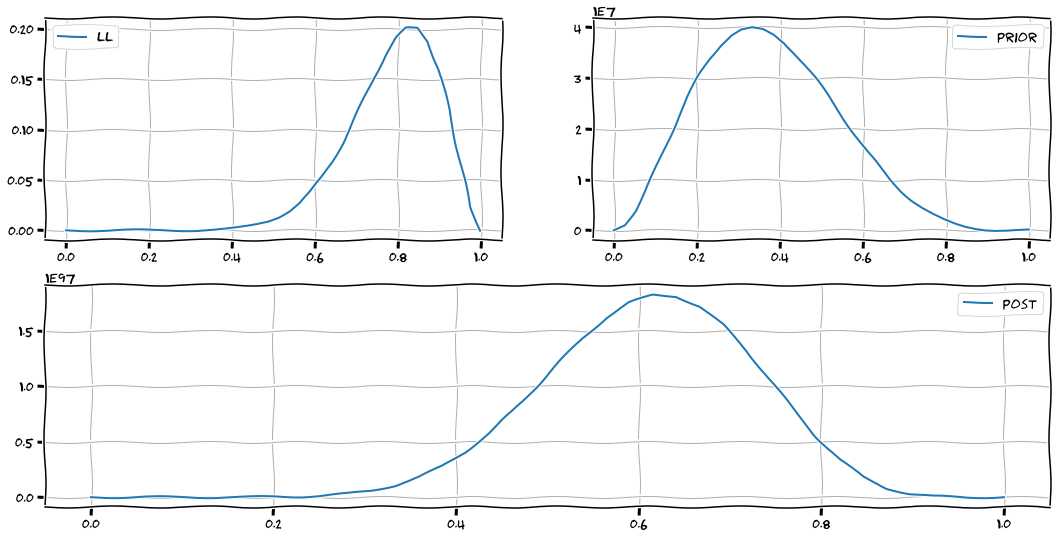

In [38]:
n = 10 # survey size
k = 8 # 'yes' to liking marmite

# beta prior params - look at the graph to see what they do
alpha = 3
beta = 5

#### Likelihood
theta_ll = np.linspace(0, 1, 40)
ll = scipy.special.binom(n, k) * theta_ll**n * (1-theta_ll)**(n-k)

#### Prior
theta_p = np.linspace(0, 1, 40)
numerator = theta_p**(alpha-1) * (1-theta_p)**(beta-1)
B = ( scipy.special.gamma(alpha) * scipy.special.gamma(beta)
            / scipy.special.gamma(alpha * beta) )
res = numerator / B

#### Posterior
theta_post = np.linspace(0, 1, 40)

alpha_prime = alpha + k
beta_prime = beta + n - k
num_post = theta_post**(alpha_prime-1) * (1-theta_post)**(beta_prime-1)
B_post = ( scipy.special.gamma(alpha_prime) * scipy.special.gamma(beta_prime)
            / scipy.special.gamma(alpha_prime * beta_prime) )
post = num_post / B_post


# Set up plotting objects
fig = plt.figure(figsize=(18, 9))
gs = fig.add_gridspec(2,2)

# LL 1x1 top left
fig_ax1 = fig.add_subplot(gs[0,0])
fig_ax1.plot(theta_ll, ll, label='ll')

# Prior 1x1 top right
fig_ax2 = fig.add_subplot(gs[0,1])
fig_ax2.plot(theta_p, res, label='prior')

# Posterior 1x2 bottom row
fig_ax3 = fig.add_subplot(gs[1, :])
fig_ax3.plot(theta_post, post, label='post')


# Extras
for f in [fig_ax1, fig_ax2, fig_ax3]:
    f.grid(True, linewidth=1)
    f.legend(fontsize=14)

plt.show()

#### Second example

There is no second example in fact. It's pretty clear that you just plug in numbers.

Note, it isn't that simple. First instance, in the case of a normal distribution, e.g. IQ, the posterior has two parameters. You must make a choice on whether you believe $\mu$ or $\sigma$ to be known or not. Though, from there, formula are ready for you.

### A word of caution

Convenience comes at a price. Conjugacy often forces excessive simplicity on your model.

If you want to be free you must learn how to do things for yourself...

## Chapter 10: Evaluation of model fit and hypothesis testing